In [303]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [304]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [305]:
df=df[['age','fare','survived']]


In [306]:
X_train, X_test,y_train,y_test=train_test_split(df.iloc[:,0:2],df.iloc[:,-1],test_size=0.2)

In [307]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed=imputer.fit_transform(X_train)
X_test_imputed=imputer.fit_transform(X_test)

X_train= pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test= pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [308]:
X_train

,age,fare
0,21.000000,262.3750
1,48.000000,76.7292
2,14.000000,120.0000
3,33.000000,9.5000
4,29.167396,7.2292
...,...,...
707,27.000000,211.5000
708,27.000000,30.5000
709,29.167396,7.8958
710,29.167396,7.7500


In [309]:

trn1=ColumnTransformer(transformers=[
        ('log_transform',FunctionTransformer(np.log1p),['fare'])                                                  
],remainder='passthrough')


In [310]:
pipe=Pipeline([
    ('transform1',trn1),
])

In [311]:
pipe.fit(X_train)

d:\PYTHON\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['fare'])]))])

In [312]:
X_train_transformed=pipe.transform(X_train)
X_test_transformed=pipe.transform(X_test)

<Axes: xlabel='fare', ylabel='Density'>

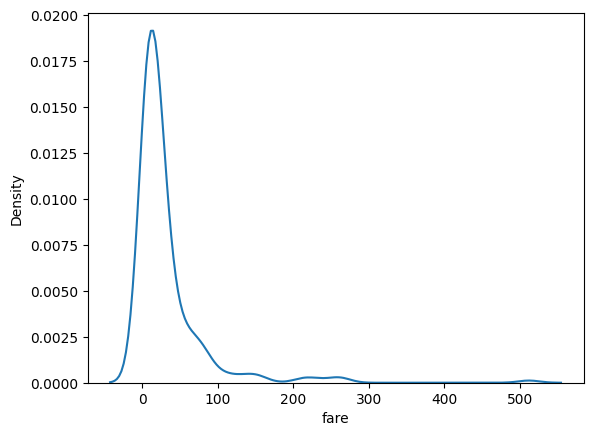

In [313]:
sns.kdeplot(X_train.iloc[:,1])

In [314]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)
original_scores = cross_val_score(lr, X_train, y_train, cv=5)  # Example: 5-fold CV
print("Mean CV score (Original X_train):", np.mean(original_scores))

Mean CV score (Original X_train): 0.6573328080370334


<Axes: ylabel='Density'>

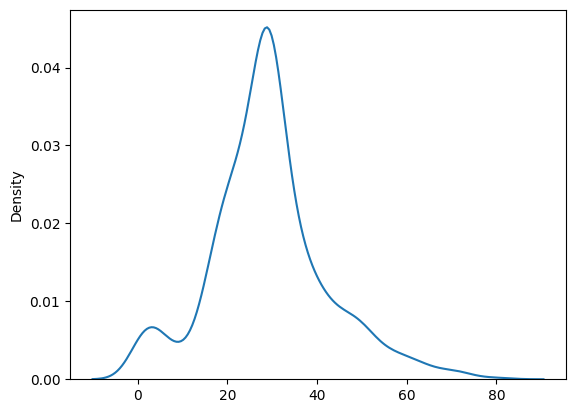

In [315]:
sns.kdeplot(X_train_transformed[:,1])

In [316]:
lr2=LogisticRegression()
lr2.fit(X_train_transformed,y_train)
y_pred2=lr2.predict(X_test_transformed)

original_scores = cross_val_score(lr, X_train_transformed, y_train, cv=5)  # Example: 5-fold CV
print("Mean CV score (Original X_train):", np.mean(original_scores))

Mean CV score (Original X_train): 0.6741751206539939
